In [1]:
import os as os
import pandas as pd
import numpy as np
from matplotlib import pyplot



In [2]:
reportsPath =  os.path.abspath("..\\bin\\Debug\\netcoreapp3.1\\reports\\countries")


In [172]:
countries_list = ["Norway", "Denmark", "Sweden", "Finland"]

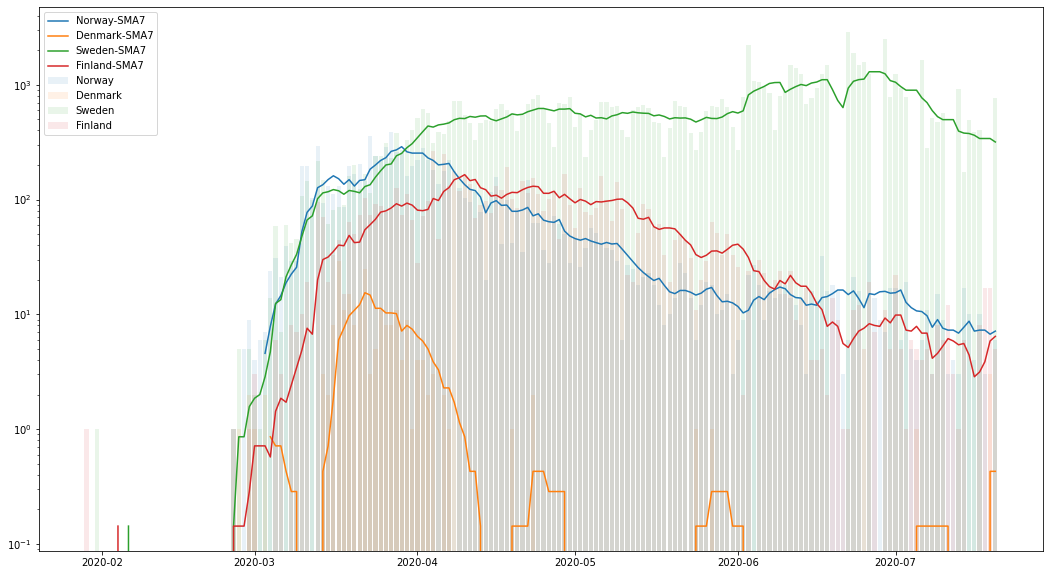

In [173]:
pyplot.figure(figsize=(18,10))

ax = pyplot.subplot(111)
ax.xaxis_date()

column_name = 'Confirmed_Change'

for country in countries_list:
    report_file = os.path.join(reportsPath,country,country+".csv")
    country_df = pd.read_csv(report_file, parse_dates=["Date"], index_col = "Date", dayfirst=True)
    
    country_df[column_name+'_SMA7'] = country_df[column_name].rolling(window=7).mean()
    ax.bar(country_df.index, country_df[column_name].values, label=country, alpha=0.1)
    ax.plot(country_df.index, country_df[column_name+'_SMA7'].values, label=country + '-SMA7') 

ax.legend()
pyplot.yscale("log")
pyplot.show()

Norway 386
Norway 288.7142857142857
Norway 246.85714285714286
Denmark 29
Denmark 15.428571428571429
Denmark 11.357142857142858
Sweden 2889
Sweden 1299.142857142857
Sweden 1114.4285714285713
Finland 267
Finland 164.85714285714286
Finland 133.85714285714286


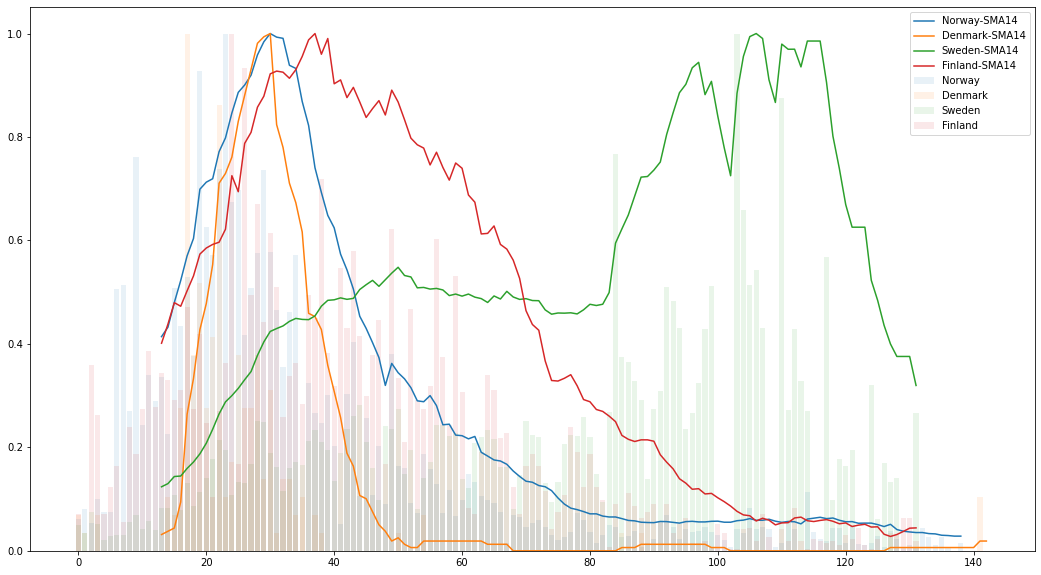

In [174]:

def normalize(country_name, values):
    max = values.max()
    print(country_name, max)
    return values / max

pyplot.figure(figsize=(18,10))

ax = pyplot.subplot(111)

for country in countries_list:
    report_file = os.path.join(reportsPath,country,country+".csv")
    country_df = pd.read_csv(report_file)

    country_df['Confirmed_Change_Normalized'] = normalize(country, country_df['Confirmed_Change'])
    condition_row = country_df[country_df.Confirmed_Change_Normalized >= 0.05].iloc[0]
    country_df = country_df[condition_row.name:]
    
    country_df['Confirmed_Change_SMA7'] = normalize(country, country_df['Confirmed_Change'].rolling(window=7).mean())
    country_df['Confirmed_Change_SMA14'] = normalize(country, country_df['Confirmed_Change'].rolling(window=14).mean())

    #country_df.dropna(inplace=True, subset=['Confirmed_Change_SMA14'])

    country_df.reset_index(inplace=True, drop=True)

    ax.bar(country_df.index, country_df['Confirmed_Change_Normalized'].values, label=country, alpha=0.1)
    ax.plot(country_df.index, country_df['Confirmed_Change_SMA14'].values, label=country + '-SMA14') 

ax.set_ylim(bottom=0)
ax.legend()
pyplot.show()


In [5]:
russiaRegions = os.path.join(reportsPath,"Russia\\regions")
region_dfs = {}
for region_report in os.listdir(russiaRegions):
    region_report_path = os.path.join(russiaRegions, region_report)
    region_df = pd.read_csv(region_report_path, parse_dates=["Date"], index_col = "Date", dayfirst=True)
    region_dfs[os.path.splitext(region_report)[0]] = region_df.iloc[58:]

In [6]:
moscow_df = region_dfs.pop("Москва")

In [143]:
column_name = "Confirmed_Change"

regions_df = pd.DataFrame()

for region, region_df in region_dfs.items():
    regions_df[region] = region_dfs[region][column_name]

regions_df.head()

,Адыгея,Алтай,Алтайский край,Амурская обл.,Архангельская обл.,Астраханская обл.,Башкортостан,Белгородская обл.,Брянская обл.,Бурятия,...,Ульяновская обл.,Хабаровский край,Хакасия,ХМАО – Югра,Челябинская обл.,Чечня,Чувашия,Чукотский АО,Ямало-Ненецкий АО,Ярославская обл.
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-29,0,0,0,1,0,0,1,1,0,0,...,0,2,0,1,3,4,0,0,0,1
2020-03-30,3,0,1,0,4,0,0,3,0,5,...,0,0,1,0,2,0,0,0,0,0
2020-03-31,0,0,1,0,0,2,2,0,0,6,...,0,1,0,0,0,0,0,0,0,0
2020-04-01,0,0,1,0,0,0,1,0,2,6,...,0,1,0,3,7,1,0,0,0,0
2020-04-02,1,0,1,0,0,0,2,1,0,5,...,0,0,0,0,0,0,0,0,2,0


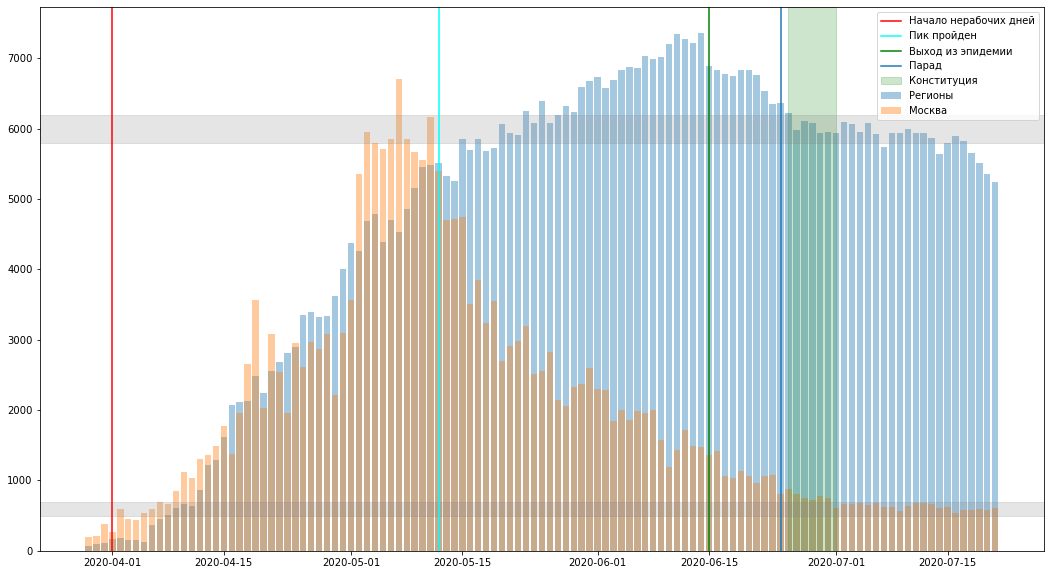

In [144]:
pyplot.figure(figsize=(18,10))

ax = pyplot.subplot(111)
ax.xaxis_date()

regions_df['Total'] = 0
regions_df['Total'] = regions_df.sum(axis = 1)

ax.bar(regions_df.index, regions_df['Total'].values, label = 'Регионы', alpha=0.4)
ax.bar(moscow_df.index, moscow_df[column_name].values, label = 'Москва', alpha = 0.4)

ax.axvline(pd.to_datetime('01-04-2020', dayfirst=True), label = 'Начало нерабочих дней', color = 'Red')
ax.axvline(pd.to_datetime('12-05-2020', dayfirst=True), label = 'Пик пройден', color = 'Cyan')
ax.axvline(pd.to_datetime('15-06-2020', dayfirst=True), label = 'Выход из эпидемии', color = 'Green')
ax.axvline(pd.to_datetime('24-06-2020', dayfirst=True), label = 'Парад')
ax.axvspan(pd.to_datetime('25-06-2020', dayfirst=True), pd.to_datetime('01-07-2020', dayfirst=True), label='Конституция', alpha = 0.2, color = 'Green')
ax.axhspan(5800, 6200, alpha = 0.2, color = 'Grey')
ax.axhspan(500, 700, alpha = 0.2, color = 'Grey')

#ax.set_ylim(bottom=5000, top = 6500)
ax.legend()
pyplot.show()

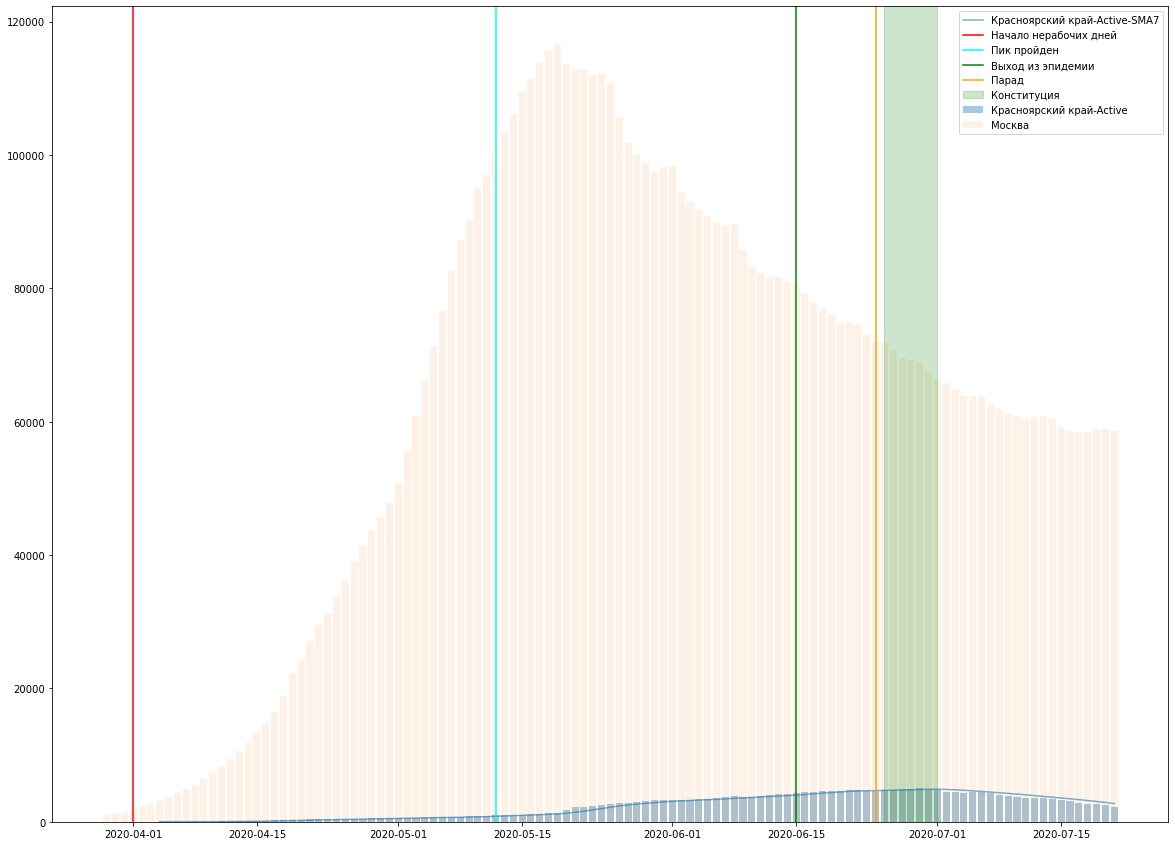

In [175]:
pyplot.figure(figsize=(20,15))

ax = pyplot.subplot(111)
ax.xaxis_date()

region_name = 'Красноярский край'
column_name = 'Active'

ax.bar(region_dfs[region_name].index, region_dfs[region_name][column_name].values, label = region_name+'-'+column_name, alpha=0.4)
ax.plot(
    region_dfs[region_name].index,
    region_dfs[region_name][column_name].rolling(window=7).mean().values,
    label = region_name+'-'+column_name+'-SMA7',
    alpha=0.6)
#ax.bar(moscow_df.index, moscow_df[column_name].values, label = 'Москва', alpha = 0.1)

ax.axvline(pd.to_datetime('01-04-2020', dayfirst=True), label = 'Начало нерабочих дней', color = 'Red')
ax.axvline(pd.to_datetime('12-05-2020', dayfirst=True), label = 'Пик пройден', color = 'Cyan')
ax.axvline(pd.to_datetime('15-06-2020', dayfirst=True), label = 'Выход из эпидемии', color = 'Green')
ax.axvline(pd.to_datetime('24-06-2020', dayfirst=True), label = 'Парад', color = 'Orange')
ax.axvspan(pd.to_datetime('25-06-2020', dayfirst=True), pd.to_datetime('01-07-2020', dayfirst=True), label='Конституция', alpha = 0.2, color = 'Green')
#ax.axhspan(5800, 6200, alpha = 0.2, color = 'Grey')
#ax.axhspan(500, 700, alpha = 0.2, color = 'Grey')

#ax.set_ylim(bottom=5000, top = 6500)
ax.legend()
pyplot.show()